Sensor placement analysis of the model in "_Structural analysis for the sensor location problem in fault detection and isolation_" by C. Commault, J. Dion and S.Y. Agha, Proceedings of Safeprocess'06, Beijing, China.

To compare results, remember the difference that in this approach, in contrast to the Commault et.al. paper, the fault signals are not considered measurable.

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import sys
new_paths = ['../Misc/', '../src/','../src/faultdiagnosistoolbox/']
[sys.path.append(d) for d in new_paths if not d in sys.path]
from misc import *
import faultdiagnosistoolbox as fdt

Define the model structure

In [2]:
modelDef={}
modelDef['type'] = 'MatrixStruc'
modelDef['X'] = [
    [0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 1, 0],
    [1, 0, 0, 0, 1, 0, 1],
    [0, 1, 0, 0, 0, 1, 0],
    [1, 1, 1, 0, 0, 0, 0],
    [1, 1, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0],
    [0, 0, 1, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0]]

modelDef['F'] = [
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 1],
    [0, 0, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0]]

modelDef['Z'] = [
    [0, 0, 0],
    [0, 0, 0],
    [0, 0, 0],
    [0, 0, 0],
    [0, 0, 0],
    [0, 0, 0],
    [0, 0, 0],
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]]
model = fdt.DiagnosisModel(modelDef, name='Example from Commault et.al')
model.Lint()

Model: Example from Commault et.al

  Type:Structural, static

  Variables and equations
    7 unknown variables
    3 known variables
    4 fault variables
    10 equations, including 0 differential constraints

  Degree of redundancy: 3
  Degree of redundancy of MTES set: 1


  Model validation finished with 0 errors and 0 warnings.


Plot model structure

<IPython.core.display.Javascript object>


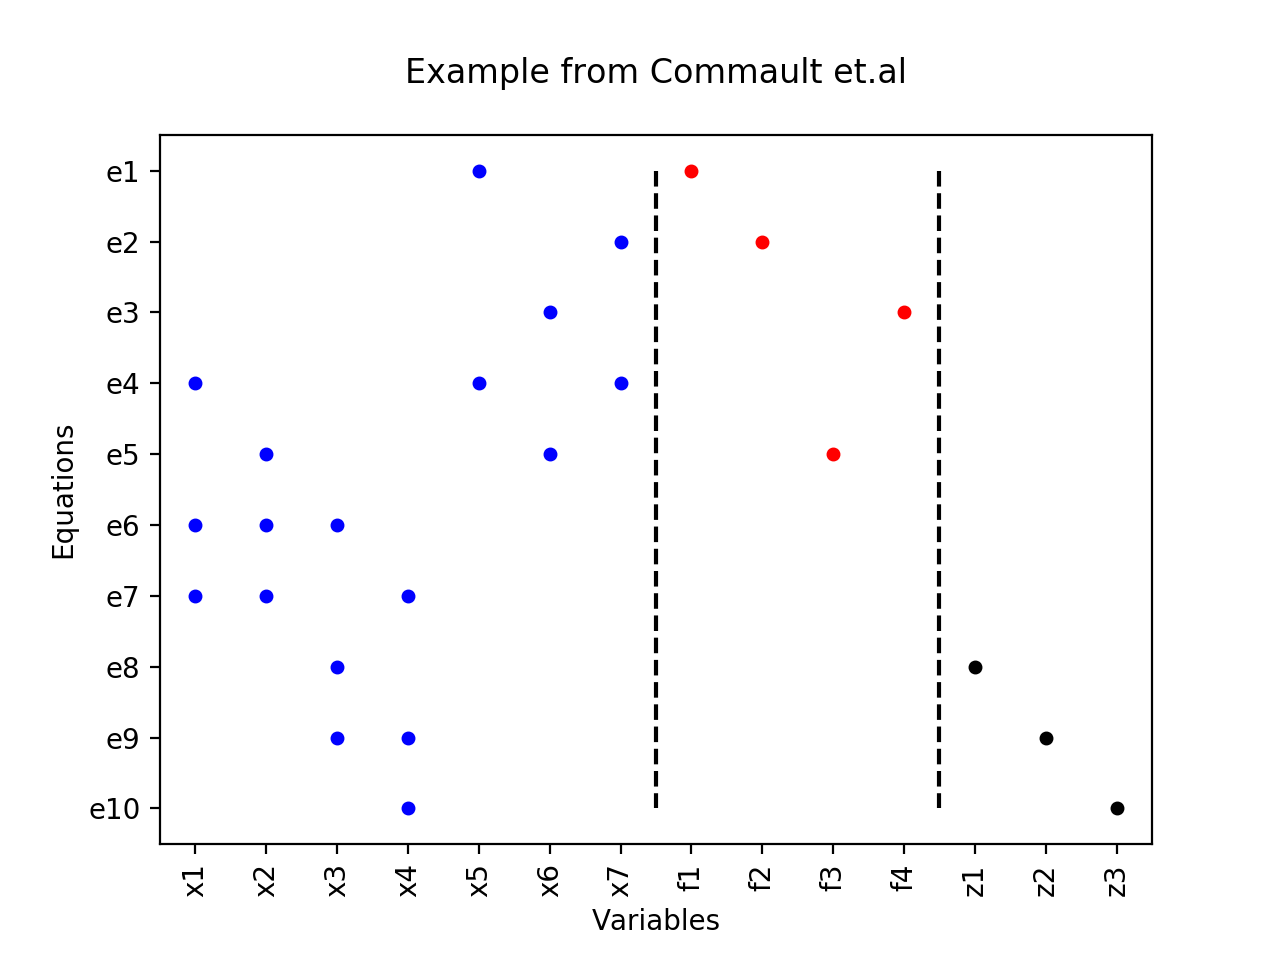

In [3]:
plt.figure(10)
model.PlotModel()

Perform isolability analysis

<IPython.core.display.Javascript object>


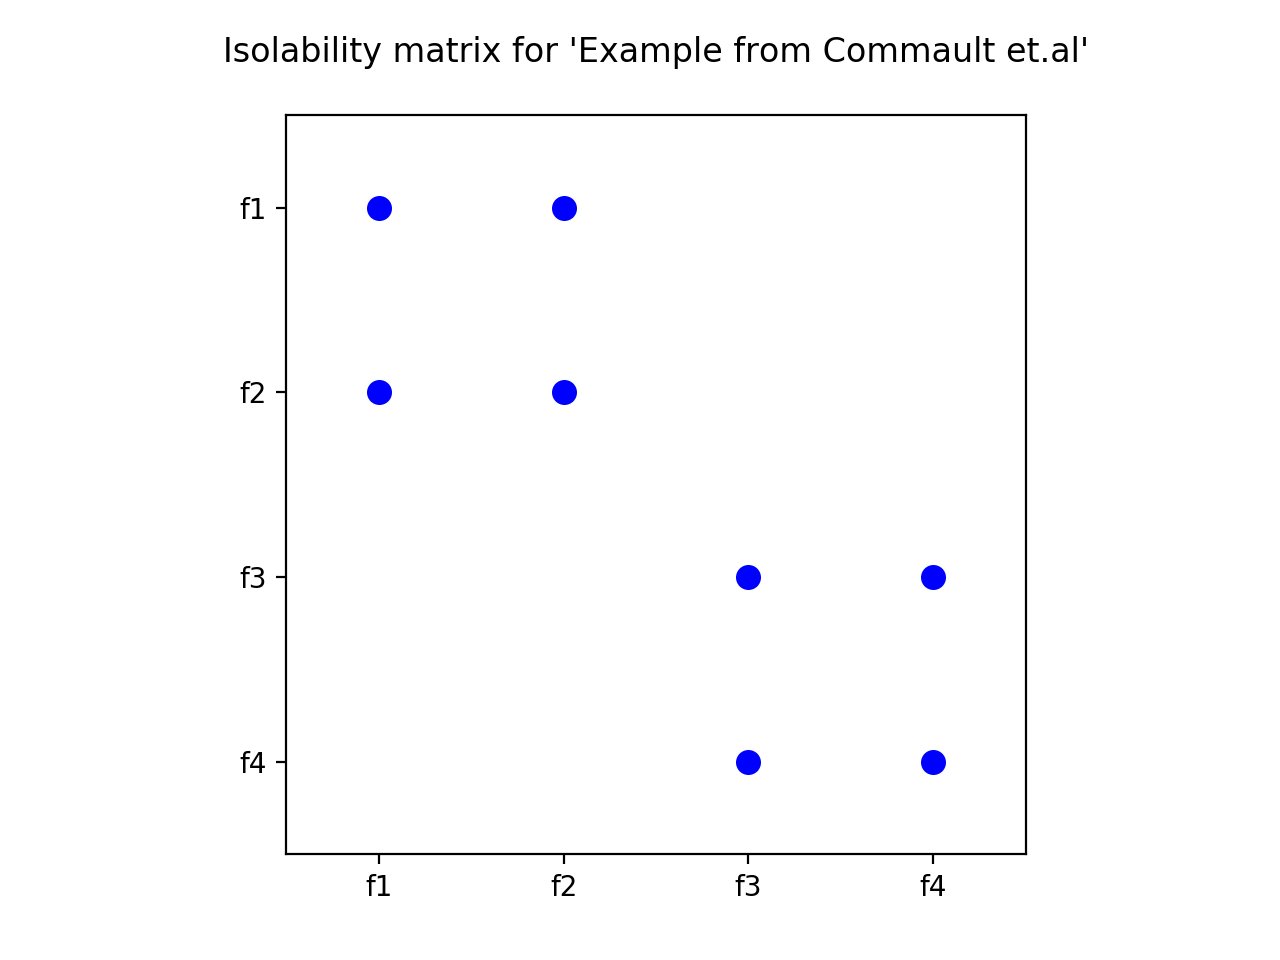

In [4]:
plt.figure(20)
model.IsolabilityAnalysis(plot=True);

In [5]:
sensSets,_ = model.SensorPlacementIsolability()
print("Found " + str(len(sensSets)) + " sensor sets")

Found 2 sensor sets


Add first sensor set and redo isolability analysis

<IPython.core.display.Javascript object>


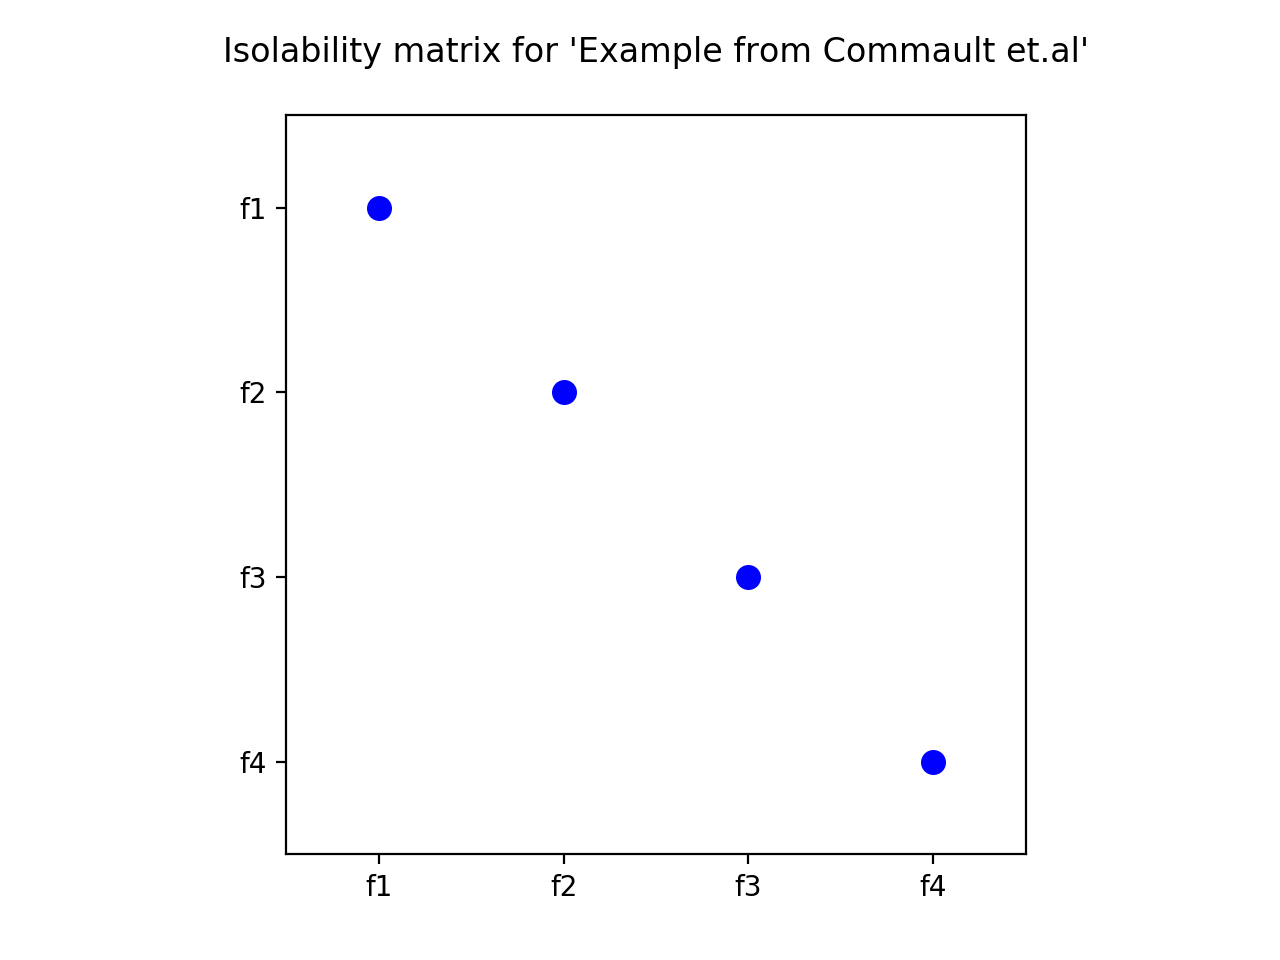

In [6]:
model2 = model.copy()
model2.AddSensors(sensSets[0])
plt.figure(30)
model2.IsolabilityAnalysis(plot=True);